
**in this code i will compare between:**

    - Lasso regularization

    - Rigid regularization

    - Elastic Net regularization


**in terms of:**

    - training speed

    - testing speed

    - R2 score

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(['passengerid', 'name', 'ticket'], axis=1, inplace=True)

In [7]:
pd.DataFrame({'unique': df.nunique(), 'types': df.dtypes, 'nulls': 100 * df.isnull().sum() / df.shape[0]})

,unique,types,nulls
survived,2,int64,0.000000
pclass,3,int64,0.000000
sex,2,object,0.000000
age,88,float64,19.865320
sibsp,7,int64,0.000000
parch,7,int64,0.000000
fare,248,float64,0.000000
cabin,147,object,77.104377
embarked,3,object,0.224467


In [8]:
df.drop(['cabin'], axis=1, inplace=True)

In [9]:
df.dropna(subset='embarked', inplace=True)

In [10]:
df.fillna({'age': df['age'].median()}, inplace=True)

In [11]:
cols = ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embarked']
df[cols] = df[cols].astype('category')

In [12]:
pd.DataFrame({'unique': df.nunique(), 'types': df.dtypes, 'nulls': 100 * df.isnull().sum() / df.shape[0]})

,unique,types,nulls
survived,2,category,0.0
pclass,3,category,0.0
sex,2,category,0.0
age,88,float64,0.0
sibsp,7,category,0.0
parch,7,category,0.0
fare,247,float64,0.0
embarked,3,category,0.0


In [13]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [14]:
for _ in df.select_dtypes('float64').columns:
    Q1 = df[_].quantile(.25)
    Q3 = df[_].quantile(.75)
    IQR = Q3 - Q1
    lower = Q1 - IQR * 1.5
    upper = Q3 + IQR * 1.5
    df[_] = df[_].clip(lower, upper)

In [15]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.5,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


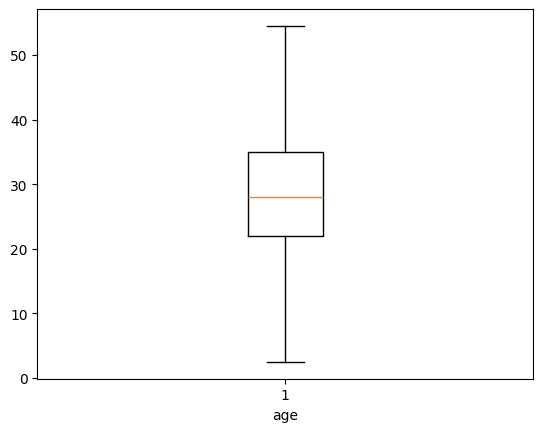

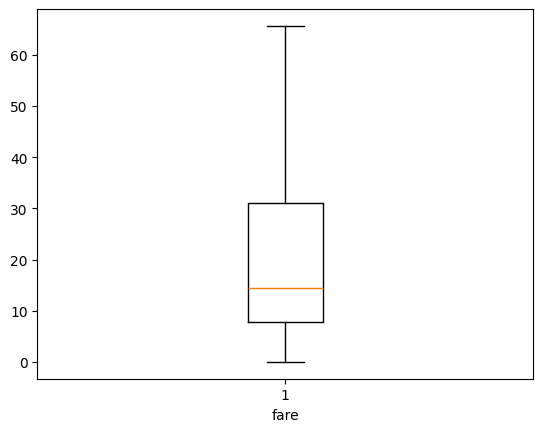

In [16]:
for _ in df.select_dtypes('float64').columns:
    plt.boxplot(df[_])
    plt.xlabel(_)
    plt.show()

In [17]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.5,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [18]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

In [19]:
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,65.6563,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [20]:
pd.DataFrame({'unique': df.nunique(), 'types': df.dtypes, 'nulls': 100 * df.isnull().sum() / df.shape[0]})

,unique,types,nulls
survived,2,category,0.0
pclass,3,category,0.0
age,65,float64,0.0
sibsp,7,category,0.0
parch,7,category,0.0
fare,204,float64,0.0
sex_male,2,bool,0.0
embarked_Q,2,bool,0.0
embarked_S,2,bool,0.0


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV

x = df.drop(['survived'], axis=1)
y = df['survived']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.2, random_state=11)

In [22]:
scaler = StandardScaler()

xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [23]:
import time

lassoParams = {
    'max_iter': [1000, 5000],
    'alpha': [.0001, .001, .01, .1, 1, 10, 100]
}

lassoGS = GridSearchCV(
    estimator=Lasso(),
    cv=5,
    scoring='neg_mean_squared_error',
    param_grid=lassoParams,
    n_jobs=-1
)

t = time.time()

lassoGS.fit(xTrainScaled, yTrain)

t = time.time() - t

print(f'lasso training time: {int(t / 3600)}Hours {int((t % 3600) / 60)}Minuts {t % 60}Seconds')
print(f'best lasso alpha:', lassoGS.best_params_)

lassoPredict =  lassoGS.best_estimator_.predict(xTestScaled)
print('lasso R2 score:', r2_score(yTest, lassoPredict))
print('lasso MSE score:', mean_squared_error(yTest, lassoPredict))


lasso training time: 0Hours 0Minuts 6.06727147102356Seconds
best lasso alpha: {'alpha': 0.001, 'max_iter': 1000}
lasso R2 score: 0.5178375294611801
lasso MSE score: 0.11561003309820146


In [24]:
ridgeParams = {
    'max_iter': [1000, 5000],
    'solver': ['svd', 'cholesky', 'lsqr']
}

ridgeGS = GridSearchCV(
    estimator=Ridge(),
    cv=5,
    scoring='neg_mean_squared_error',
    param_grid=ridgeParams,
    n_jobs=-1
)

t = time.time()

ridgeGS.fit(xTrainScaled, yTrain)

t = time.time() - t

print(f'ridge training time: {int(t / 3600)}Hours {int((t % 3600) / 60)}Minuts {t % 60}Seconds')
print(f'best ridge alpha:', ridgeGS.best_params_)

ridgePredict =  ridgeGS.best_estimator_.predict(xTestScaled)
print('ridge R2 score:', r2_score(yTest, ridgePredict))
print('ridge MSE score:', mean_squared_error(yTest, ridgePredict))

ridge training time: 0Hours 0Minuts 0.28273725509643555Seconds
best ridge alpha: {'max_iter': 1000, 'solver': 'lsqr'}
ridge R2 score: 0.5175215338537597
ridge MSE score: 0.11568580063479954


In [25]:
ElasticNetParams = {
    'max_iter': [1000, 5000],
    'alpha': [.0001, .001, .01, .1, 1, 10, 100],
    'l1_ratio': [.0001, .001, .01, .1]
}

ElasticNetGS = GridSearchCV(
    estimator=ElasticNet(),
    cv=5,
    scoring='neg_mean_squared_error',
    param_grid=ElasticNetParams,
    n_jobs=-1
)

t = time.time()

ElasticNetGS.fit(xTrainScaled, yTrain)

t = time.time() - t

print(f'ElasticNet training time: {int(t / 3600)}Hours {int((t % 3600) / 60)}Minuts {t % 60}Seconds')
print(f'best ElasticNet alpha:', ElasticNetGS.best_params_)

ElasticNetPredict =  ElasticNetGS.best_estimator_.predict(xTestScaled)
print('ElasticNet R2 score:', r2_score(yTest, ElasticNetPredict))
print('ElasticNet MSE score:', mean_squared_error(yTest, ElasticNetPredict))

ElasticNet training time: 0Hours 0Minuts 1.3169739246368408Seconds
best ElasticNet alpha: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 1000}
ElasticNet R2 score: 0.5168432350892309
ElasticNet MSE score: 0.11584843905526805
